**Game of Thrones data analysis** <br>
[data](https://www.kaggle.com/mylesoneill/game-of-thrones#battles.csv)

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

# import data
battles = pd.read_csv("data/battles.csv")
deaths  = pd.read_csv("data/character-deaths.csv")
deaths = deaths.dropna()

deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
10,Aggar,House Greyjoy,299.0,2.0,56.0,50.0,1,0,0,1,0,0,0
12,Alan of Rosby,Night's Watch,300.0,5.0,4.0,18.0,1,1,0,1,1,0,1


Results of one-way ANOVA:
                        df  sum_sq     mean_sq        F    PR(>F)
deaths_per_book.index  1.0   136.9  136.900000  0.16955  0.708164
Residual               3.0  2422.3  807.433333      NaN       NaN

Results of Linear Regression:
p-value: 0.708
r-value: -0.23

Conclusion: No significant correlation! - GoT has not become more violent over time.


/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


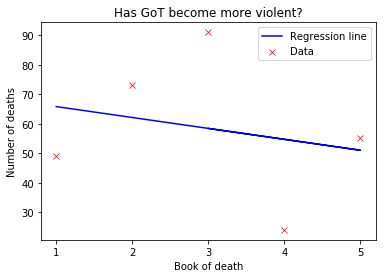

In [57]:
deaths_per_book = deaths["Book of Death"].value_counts(sort=False)

modell = ols('deaths_per_book ~ deaths_per_book.index', data=deaths_per_book).fit()
results = sm.stats.anova_lm(modell, type=1)
print('Results of one-way ANOVA:')
print(results)
print()

print('Results of Linear Regression:')
slope, intercept, r, p, std = stats.linregress(deaths_per_book.index, deaths_per_book)
print('p-value: {:.3f}'.format(p))
print('r-value: {:.2f}'.format(r))

print()
print('Conclusion: No significant correlation! - GoT has not become more violent over time.')

fig, axes = plt.subplots()
sns.scatterplot(x=deaths_per_book.index, y=deaths_per_book, color='r', marker='x', ax=axes)
axes.set(xticks=[1,2,3,4,5], xlabel='Book of death', ylabel='Number of deaths', title='Has GoT become more violent?')
axes.plot(deaths_per_book.index, intercept + slope*deaths_per_book.index, color='b')
axes.legend(['Regression line', 'Data'])
fig.show()